# Pace : Plan

# 1) understand the business senario and problem
(I made ChatGPT suggest senario and problem to me)

# Business Problem: Crop Recommendation System

  **Context**: Farmers often plant the wrong crops for their specific soil type or region, leading to suboptimal yields. With the right data, farmers can grow crops that are better suited to their land and climate.

  **Problem to Solve**: Develop a crop recommendation system that suggests the best crops to plant based on historical yield data, soil quality, and regional climate.

  **Solution**: Use the dataset to analyze crop performance across different regions and soil types. Build an algorithm that recommends the most profitable crops for a farmer based on their location and available resources.
  
  **Business Impact**: Improved crop yields, reduced waste, and increased profitability for farmers through data-driven crop selection.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [7]:
data = pd.read_csv('yield_df.csv',index_col='Unnamed: 0')

In [8]:
data.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


# Data Preprosessing and Exploration
The Resouse that I get from it the data said that the data is cleaned,So will get some checks

In [9]:
# knowing the dimentions of the data that consists of 28242 rows and 7 columns
data.shape

(28242, 7)

In [10]:
# describe a datatype of the data and show total number of rows
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [11]:
# summary statics for numerical values
data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [12]:
# checking for null values
data.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


it seams that we have 2310 duplicated value

In [13]:
# checking for duplicates values
data.duplicated().sum()

2310

In [14]:
# Drop the dupicates data then replace the it with orignal data after droping
data.drop_duplicates(inplace=True)

In [15]:
# checking for the shape after droping the duplicates values
data.shape

(25932, 7)

In [16]:
"""
*** This function remove outliers from the data ***

args : data

return : data without outliers

"""
def outliers(data):
  for col in data.columns:
    # check if the column is numerical
    # if data[col].dtype == int or data[col].dtype == float:
    if isinstance(data[col].dtype, int or float):
       Q1 = data.quantile(0.25)
       Q3 = data.quantile(0.75)

       IQR = Q3 - Q1

       lower_bound = IQR * 1.5 - Q1
       upper_bound = IQR * 1.5 + Q3

       data = data[(data >= lower_bound) & (data <= upper_bound)]

  return data

In [17]:
# Calling outliers function
outliers(data)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [18]:
# save the dataset after cleaning it as CSV file
data.to_csv("cleaned_yield_df.csv",index=False)

In [19]:
# find out the number of unique values in every columns
for columns in data.columns :
  print(f"Columns {columns} has {data[columns].nunique()} unique values")

Columns Area has 101 unique values
Columns Item has 10 unique values
Columns Year has 23 unique values
Columns hg/ha_yield has 11514 unique values
Columns average_rain_fall_mm_per_year has 100 unique values
Columns pesticides_tonnes has 1673 unique values
Columns avg_temp has 1831 unique values


In [20]:
# find out the unique values in every object columns
for col in data.columns:
  if data[col].dtype == 'object':
    print(f"Columns {col} has \n {data[col].unique()} unique values")

Columns Area has 
 ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switz

In [21]:
# find out the start date and end date in my data
data.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [22]:
# The highest 10 number 10 d
data.nlargest(10,'hg/ha_yield')

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2470,Belgium,Potatoes,2011,501412,847.0,5740.44,11.69
21297,New Zealand,Potatoes,2010,495751,1732.0,5086.00,13.54
21301,New Zealand,Potatoes,2011,490361,1732.0,5086.00,13.46
26103,Switzerland,Potatoes,1996,487219,1537.0,1746.30,6.66
21305,New Zealand,Potatoes,2012,484810,1732.0,5086.00,12.89
2449,Belgium,Potatoes,2004,483955,847.0,9186.00,10.94
21309,New Zealand,Potatoes,2013,482926,1732.0,5086.00,13.57
21293,New Zealand,Potatoes,2009,478154,1732.0,5086.00,12.84
21285,New Zealand,Potatoes,2007,477612,1732.0,4939.00,13.44
2446,Belgium,Potatoes,2002,471475,847.0,9204.00,11.44


In [23]:
# miniumam average of rain of every Item in a specific year
data.groupby(["Item","Year"])["average_rain_fall_mm_per_year"].min().sort_values(ascending=False).unstack(0).head(10)

Item,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
Year,,,,,,,,,,
1990,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1991,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1992,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1993,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1994,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1995,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1996,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1997,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0
1998,151.0,51.0,630.0,51.0,51.0,51.0,51.0,51.0,51.0,92.0


In [24]:
# the mean of every Item in every area
area_for_Item = data.groupby(['Item','Area'])['hg/ha_yield'].mean().sort_values(ascending=False).unstack(0).fillna(0)
area_for_Item.head(10)

Item,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
Area,,,,,,,,,,
Albania,0.000000,42664.782609,0.00,153105.043478,33414.250000,7638.000000,14175.043478,0.000000,31575.347826,0.0
Algeria,0.000000,29027.913043,0.00,182413.956522,16959.913043,53727.045455,0.000000,0.000000,12009.913043,0.0
Angola,90274.304348,5753.869565,0.00,59085.739130,10808.608696,2926.769231,4235.538462,66975.217391,11861.086957,0.0
Argentina,100093.652174,55650.347826,0.00,262059.173913,56250.695652,42521.565217,23940.782609,149563.130435,24356.130435,0.0
Armenia,0.000000,42032.809524,0.00,151076.904762,0.000000,0.000000,0.000000,0.000000,22323.619048,0.0
Australia,0.000000,52767.869565,0.00,330944.826087,86220.739130,26628.652174,19005.826087,257610.826087,17481.130435,0.0
Austria,0.000000,94485.782609,0.00,291058.043478,0.000000,63873.250000,24285.304348,0.000000,50899.782609,0.0
Azerbaijan,0.000000,36042.523810,0.00,120398.761905,31551.095238,3324.166667,7599.850000,0.000000,22316.809524,0.0
Bahamas,123149.095238,37334.619048,77887.25,0.000000,0.000000,0.000000,0.000000,33476.666667,0.000000,0.0


In [25]:
# Count of areas that grow a specific yield in a specific year
num_of_grows_area = data.pivot_table(values='Area',columns='Item',index='Year',aggfunc='count')
num_of_grows_area.head(10)

Item,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
Year,,,,,,,,,,
1990,81,154,24,158,131,112,120,110,141,32
1991,81,154,24,158,131,112,119,110,141,33
1992,83,166,24,171,137,119,127,112,154,33
1993,83,167,24,172,136,119,128,113,155,33
1994,81,165,24,170,133,116,126,111,153,33
1995,83,167,24,172,135,119,128,113,155,33
1996,82,166,24,171,134,118,127,112,154,33
1997,81,165,24,170,133,117,126,112,153,34
1998,81,165,24,170,133,117,126,112,153,34


In [26]:
# The highest top 10 of areas are consist of 45% of all data
data.Area.value_counts().sort_values(ascending=False)[:10].sum() / len(data) * 100

45.688724356008024

In [27]:
every_yield_over_years = data.groupby(["Item","Year"])["hg/ha_yield"].max().sort_values(ascending=False).unstack(0)
every_yield_over_years

Item,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
Year,,,,,,,,,,
1990,205381,135000,394286,401380,88000,53234,33588,257930,85307,210808
1991,218925,121818,411910,398785,88427,55615,36828,270456,78646,192204
1992,232463,124583,418505,433870,89767,59232,31316,241308,80154,188269
1993,230430,126667,418505,451015,77184,61242,31552,260629,87712,176000
1994,245277,124074,418505,438786,81537,59924,33501,247138,80674,208410
1995,252775,125806,414079,450321,88003,62412,37525,259786,86189,197704
1996,238528,125692,394286,487219,82910,62667,36951,250228,89965,194514
1997,221117,125694,381003,459163,84152,66645,38018,244444,77309,209840
1998,252815,124348,381146,414881,94256,56077,35040,276923,80310,200786


# pAce : Analysis Stage

####  Perform EDA



* How has the crop yield (hg/ha) changed over the years for different items in Albania?
* Are there noticeable trends or patterns in the yield increase or decrease for specific crops?
* What is the correlation between the average rainfall per year and the crop yield for each crop type?
* Do crops with higher or lower rainfall show better yields?
* Is there a relationship between the amount of pesticides used (tonnes) and the crop yield across different crops and years?
* How does the average temperature affect crop yield across the years?
* Which crop had the highest yield in each year?
* What factors (rainfall, pesticides, temperature) contributed to these higher yields?
* Which crops show the highest variability in yield across the years, and what could be the reason for this?
* Does the combination of high rainfall and high pesticide usage improve or reduce crop yields?




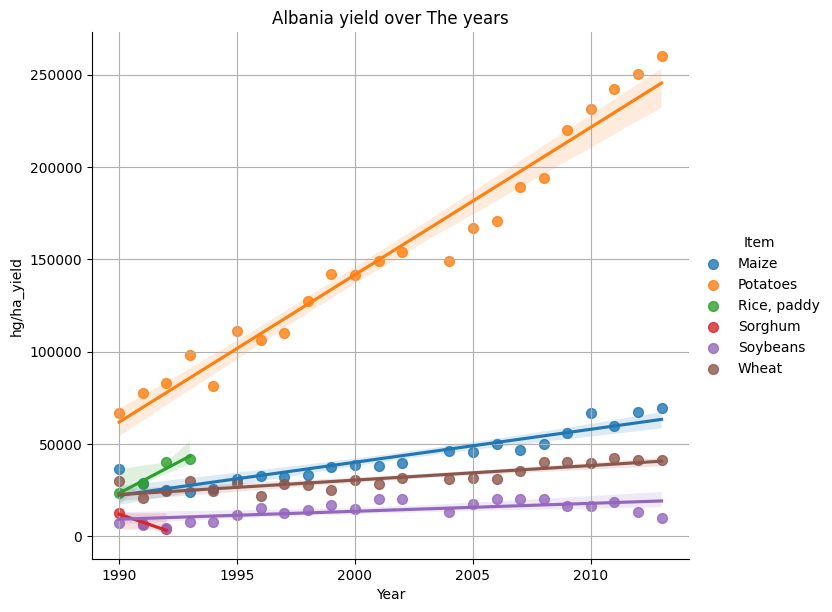

In [28]:
# (1)
albania_data = data[data['Area'] == 'Albania']
sns.lmplot(albania_data,x="Year",y="hg/ha_yield",hue='Item',scatter_kws={'s':50},aspect=1.2, height=6)
plt.title("Albania yield over The years")
plt.grid()
plt.show()

# **insights**
>it seems that there is the linear correlation of potatoes yield over time is very high then the Maize comes with a good correlation over time

# **Suggested Actions**

>investing in increasing the sales,quality and exporting it


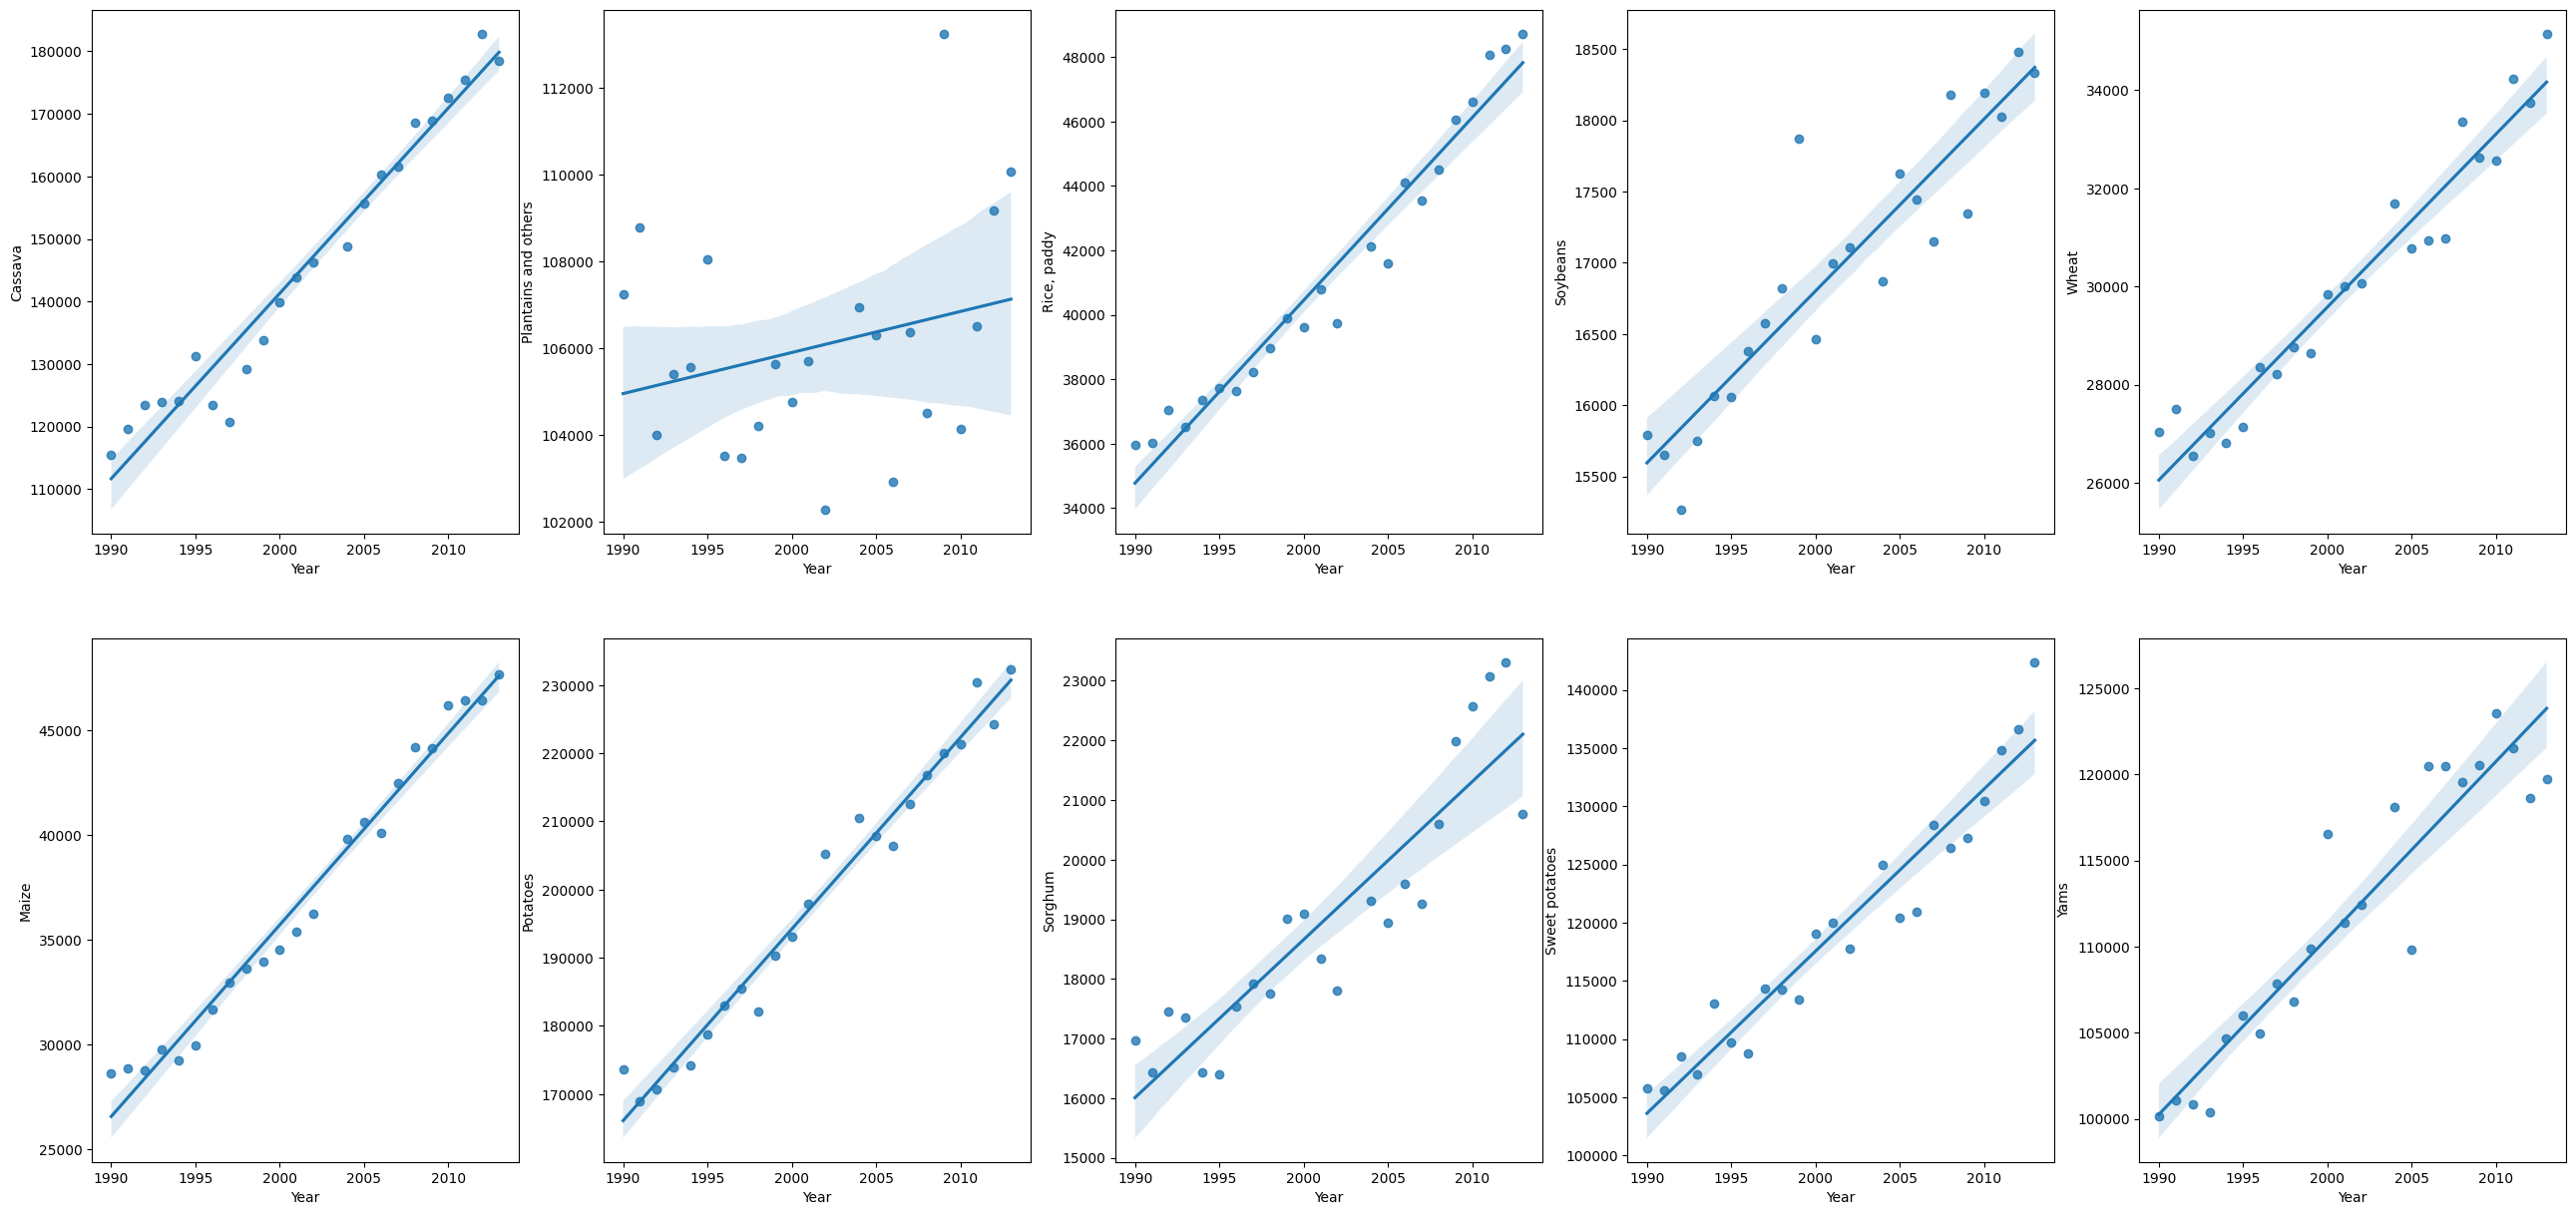

In [29]:
# (2)
every_yield_over_years = data.groupby(["Item","Year"])["hg/ha_yield"].mean().sort_values(ascending=False).unstack(0).reset_index()
every_yield_over_years
fig , ax = plt.subplots(2,5,figsize=(32,15))
i , j = 0 , 0
for item in every_yield_over_years.columns[1:]:
  sns.regplot(every_yield_over_years,x="Year",y=item ,ax=ax[i,j])
  i = i + 1
  if i == 2:
    i = 0
    j = j + 1
plt.show()

# **Insights**

> it seems most of yield has a strong linear correlation over the years , it high increasing except Plantains and others it like more close to non-linear U-shaped correlation

# **Suggested Actions**

> Making offers for resturants and Grocery stores on yield that high increasing

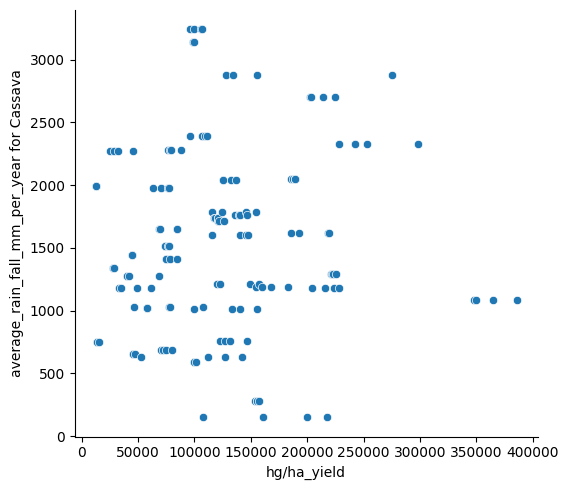

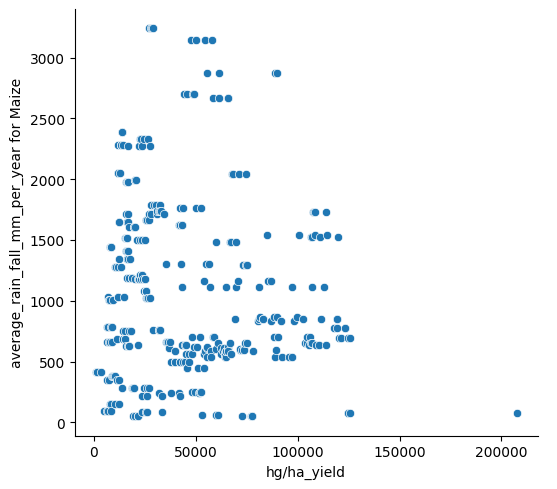

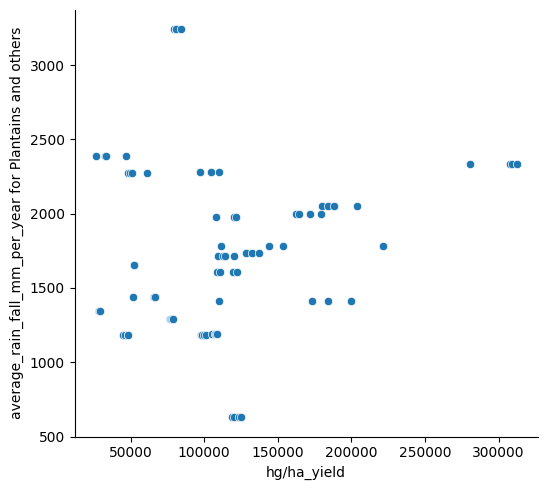

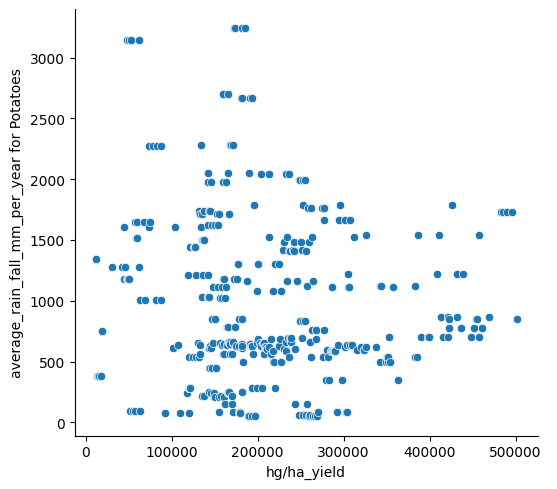

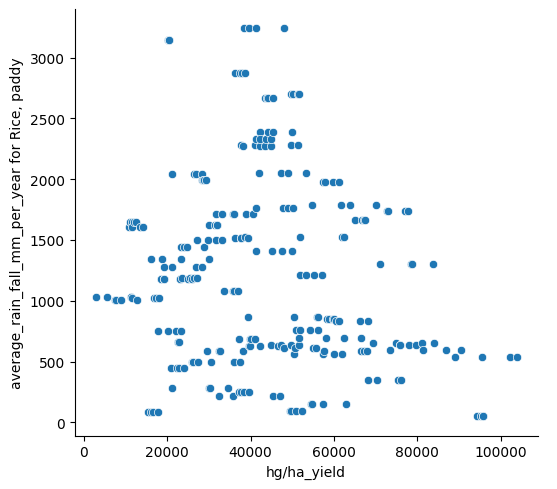

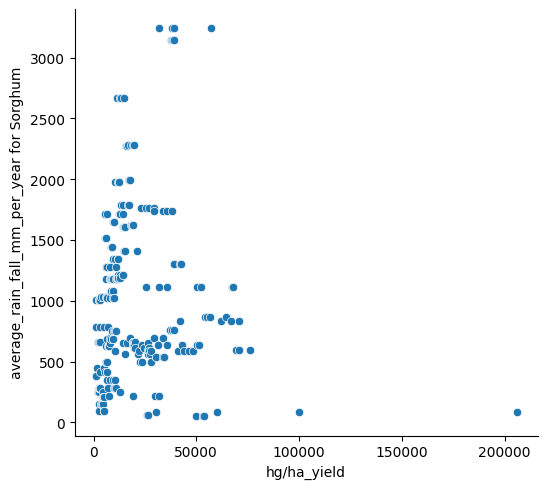

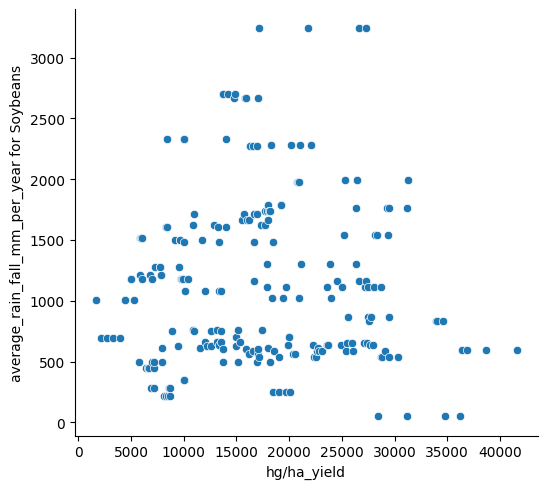

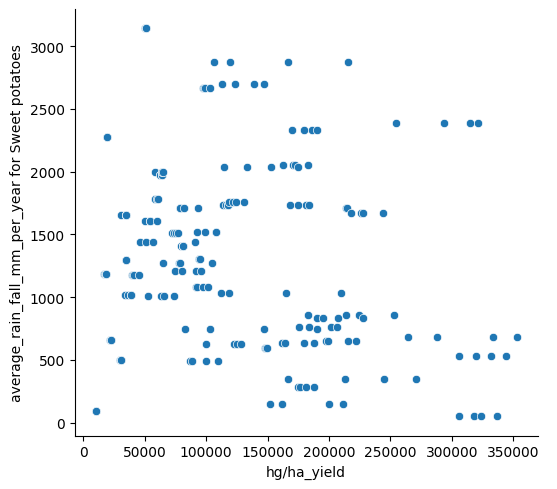

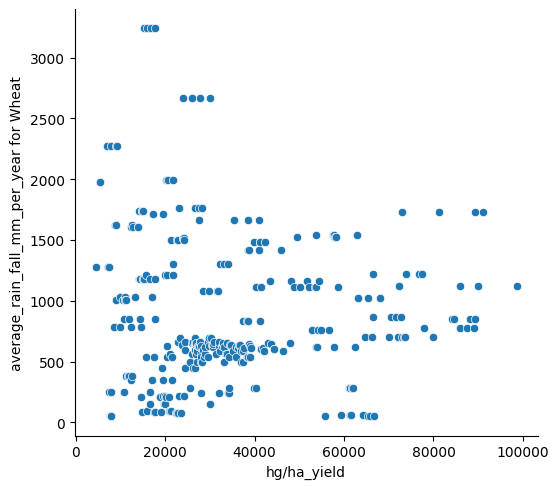

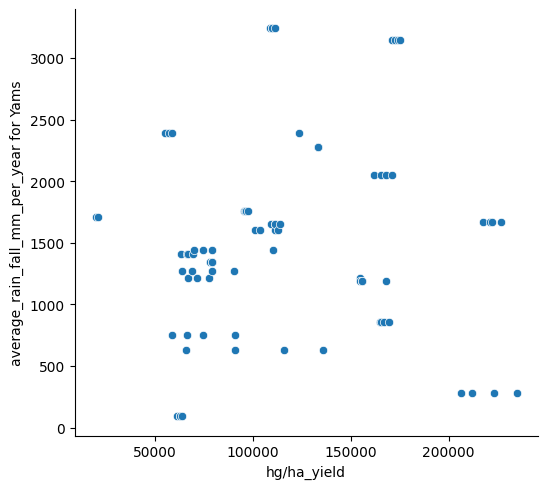

In [30]:
rain_fall_yield = data.groupby(["hg/ha_yield","Item","Area","Year"])["average_rain_fall_mm_per_year"].max().sort_values(ascending=False).unstack(1).reset_index()
specific_years = rain_fall_yield.where(rain_fall_yield["Year"] >= 2010)
items = rain_fall_yield.columns[3:]

for item in items :
  g = sns.FacetGrid(data=specific_years,aspect=1.1,height=5)
  g.map_dataframe(sns.scatterplot,x='hg/ha_yield',y=item)
  g.add_legend()
  g.set_axis_labels("hg/ha_yield", f"average_rain_fall_mm_per_year for {item}")
plt.show()

# **Insights**
Note : this insights in the last 4 years only
> Cassava :
> there is no  strong linear correlation between average rain fall and Cassava yield grows , most of the data are speard out from almost (50000 to 200000) with 2500 average rain fall for grows this amount of yield

> Maize :
> there is no clear strong linear correlation , most of Maize yield grows data points are spread out (0 to 125000) with 1750 for average rainfall

> Plantains and other :
> there is also here no clear strong linear correlation and number of data points are very small to observe

> Potatoes :
> there is no clear strong linear correlation but maybe non-linear , most data of potatoes yield are spread out from almost (100000 to 350000) with almost 2000 for average rain fall and there high variability

> Rice , paddy :
> there is no clear strong linear correlation with high variability , in my opinion the data point are clustered into two groubed , the first groub with Rice , paddy yield almost from (20000 to 90000) and average rainfall almost from (0 to 900) , the second groub with Rice , paddy yield almost from (10000 to 80000) and average rainfall almost from (1000 to 2300)

> Sorghum :
> there is no clear strong linear correlation with low variability compared to other yield and almost all data point of sorghum yield are spread out from (0 to 55000) with average rainfall from (0 to 1800)

> Soybeans :
> there is no clear strong linear correlation with high variability and high density soybeans yield at (10500 to 30000) with average rainfall from (500 to 700)

> Sweet potatoes :
> there is no clear strong linear correlation with high variability ,low density
on almost all of data points

> Wheet :
>there is no clear strong linear correlation with high variability and low density in wheet yield from (20000 to 50000) with average rainfall_mm_per_year from (150 to 700)

> Yams:
> there is no enough data points to observe but the existing data are spread out all over the with high distance between each other

# Suggested action
> it seems that the grows of yield doesn't depend on the average of rainfall So it better to not investing or focusing on watering the yield by rainfall

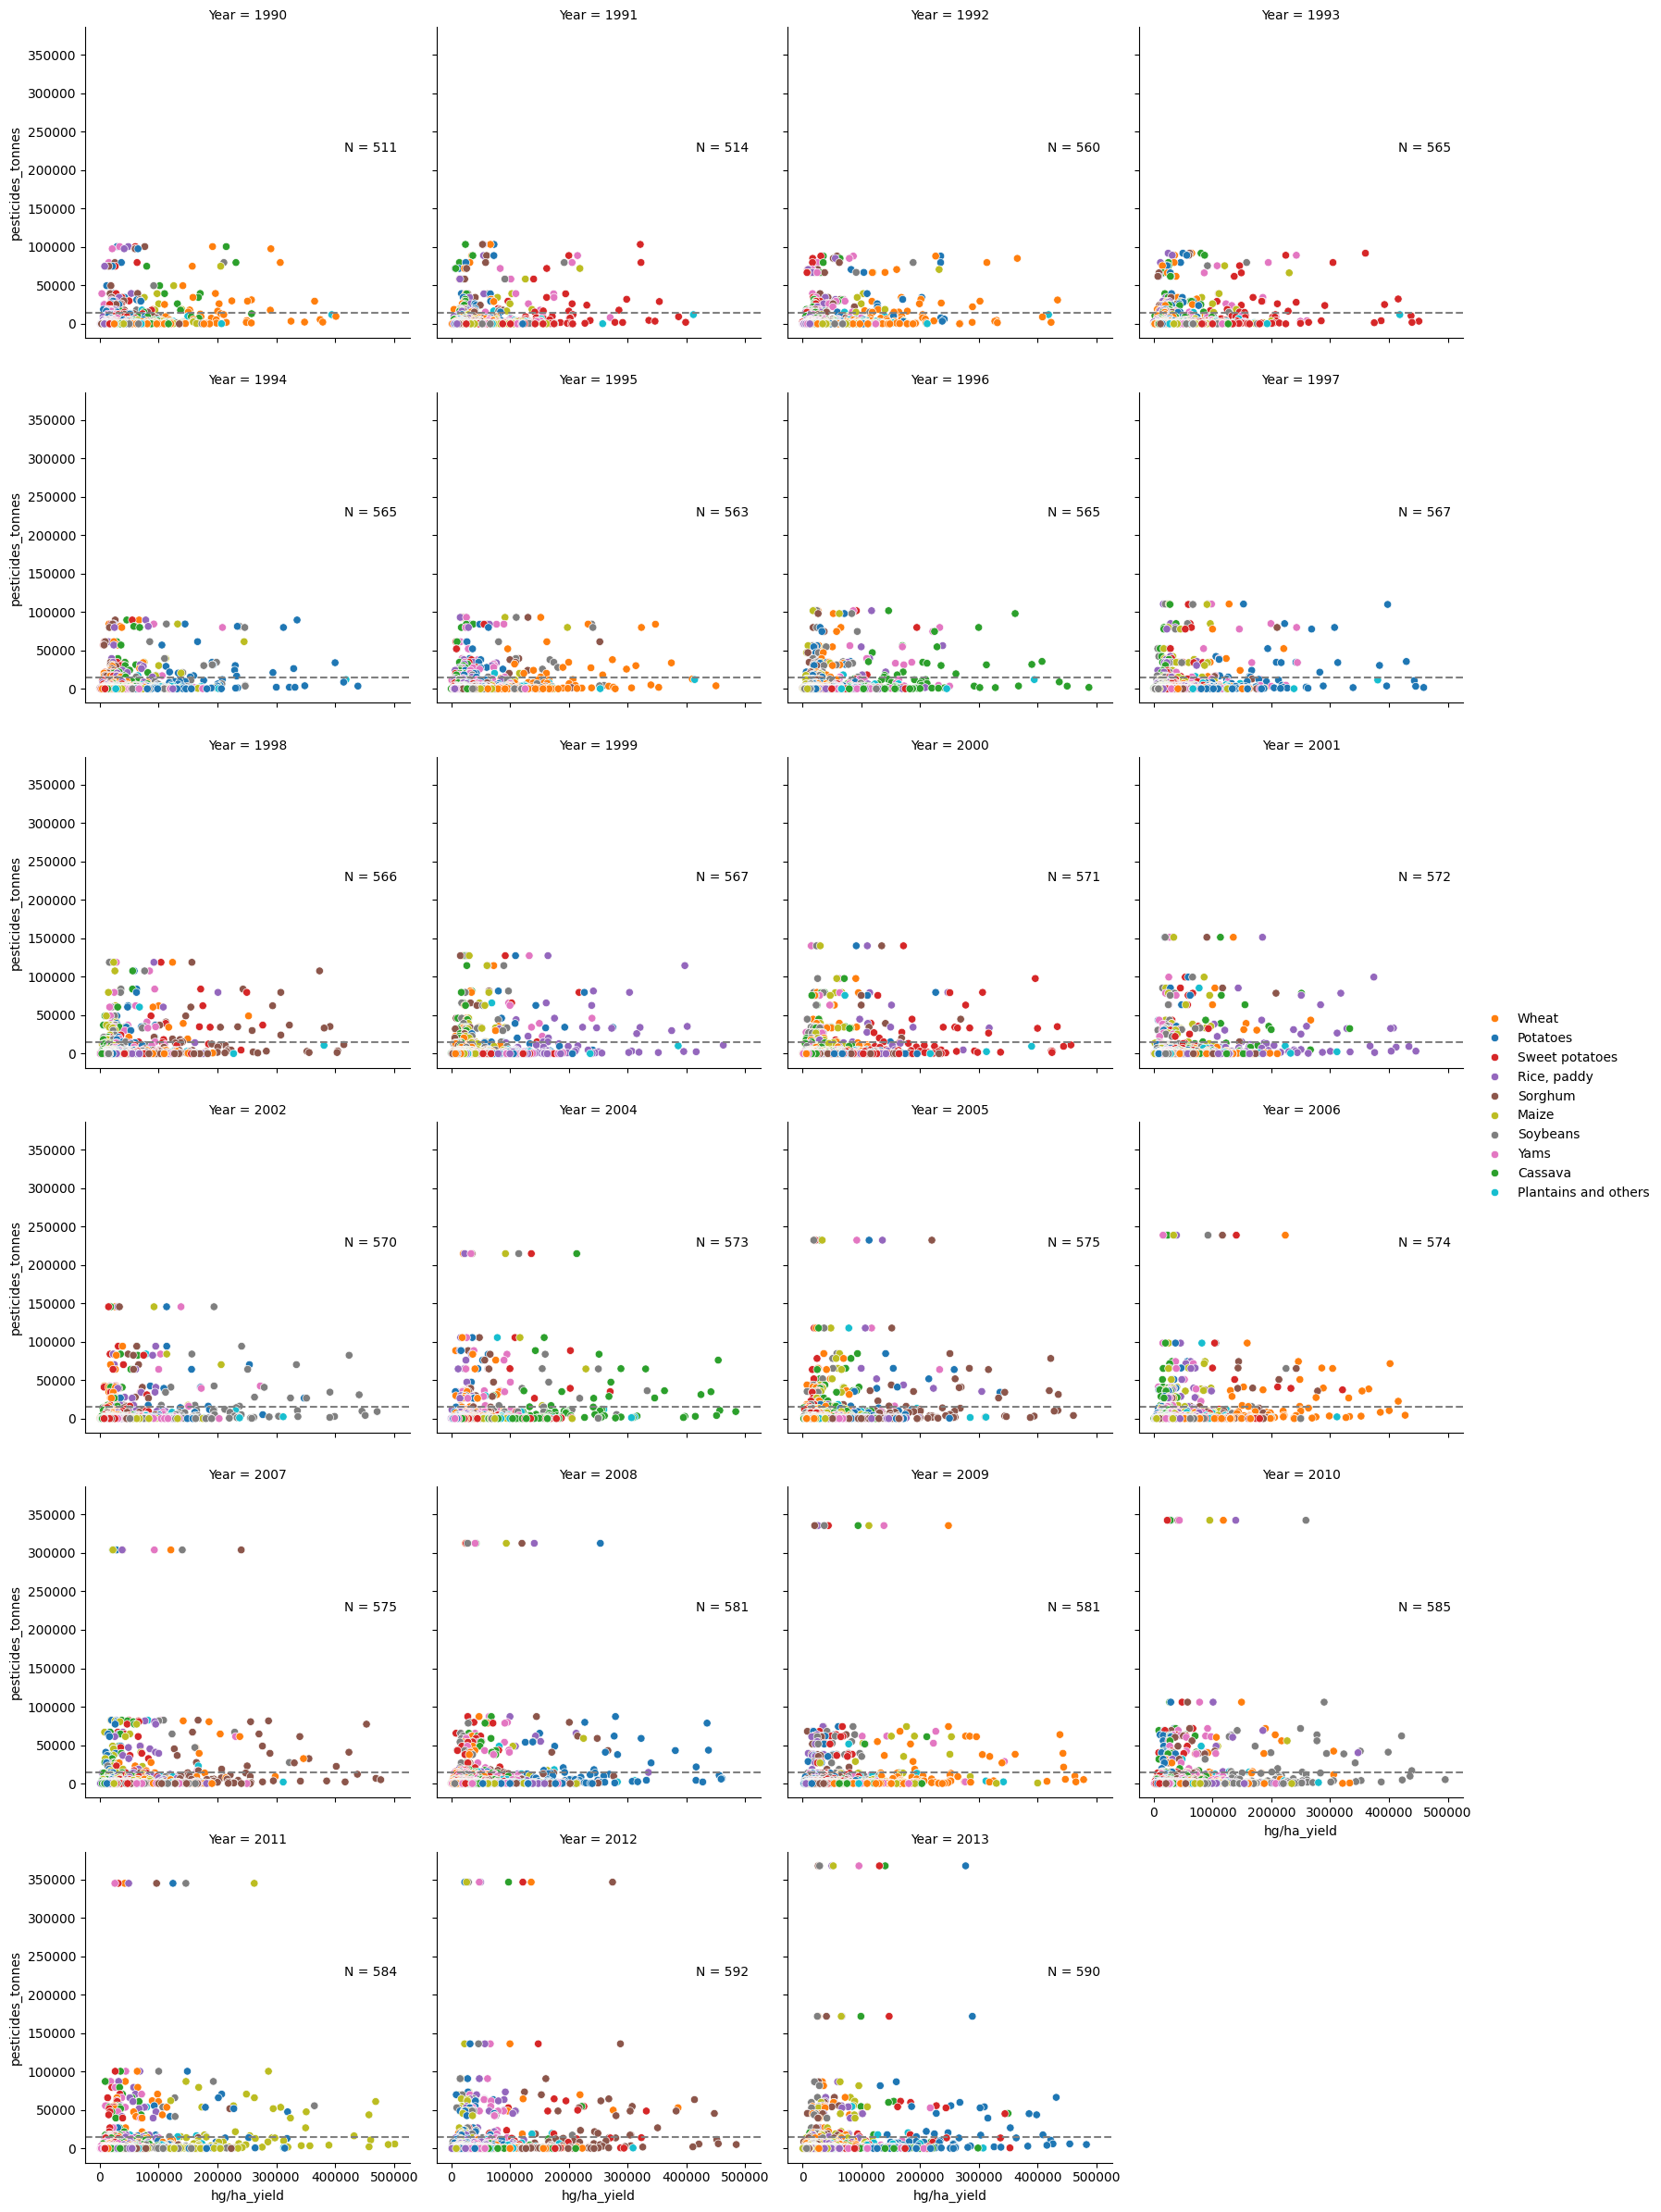

In [35]:
pesticides_data = data.groupby(["Item","Year","hg/ha_yield"])["pesticides_tonnes"].max().sort_values(ascending=False).reset_index()
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.8, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(pesticides_data , col="Year", col_wrap=4,aspect=1.01,height=4)
g.map_dataframe(sns.scatterplot,x="hg/ha_yield",y="pesticides_tonnes",hue="Item")
g.map_dataframe(annotate)
g.refline(y=pesticides_data["pesticides_tonnes"].mean())
g.add_legend()
plt.show()

# **insights**
> it seems that from year (1990 to 1996) the amount Pesticides was almost 100000 , the mean of data points are using Pesticides almost half of 100000 but however the most of high grows yield are that not using pesticides with low variability

> then from (1997 to 2002) the useage of Pesticides are geting increasing until reach 150000 on some yields however there is not increasing yields grows but i observed after feeding the some yield high pesticides then feeding it with lower amount the yield grows getting higher but not with every yields one or two based of chart

> then from (2004 to 2013) the useage of Pesticides continued to increase until reached to over 350000 in 2013 , I obseve that whatever the amount of pesticides the amount of yield grows is between (0 to 300000) over all years ,but i observed after feeding the some yield high pesticides then feeding it with lower amount the yield grows getting higher but not with every yields one or two based of chart

# Suggested Actions

> oviesly the increasing the amout of pesticides not increasing the amount of crop yield so investing in pesticides not a good idea

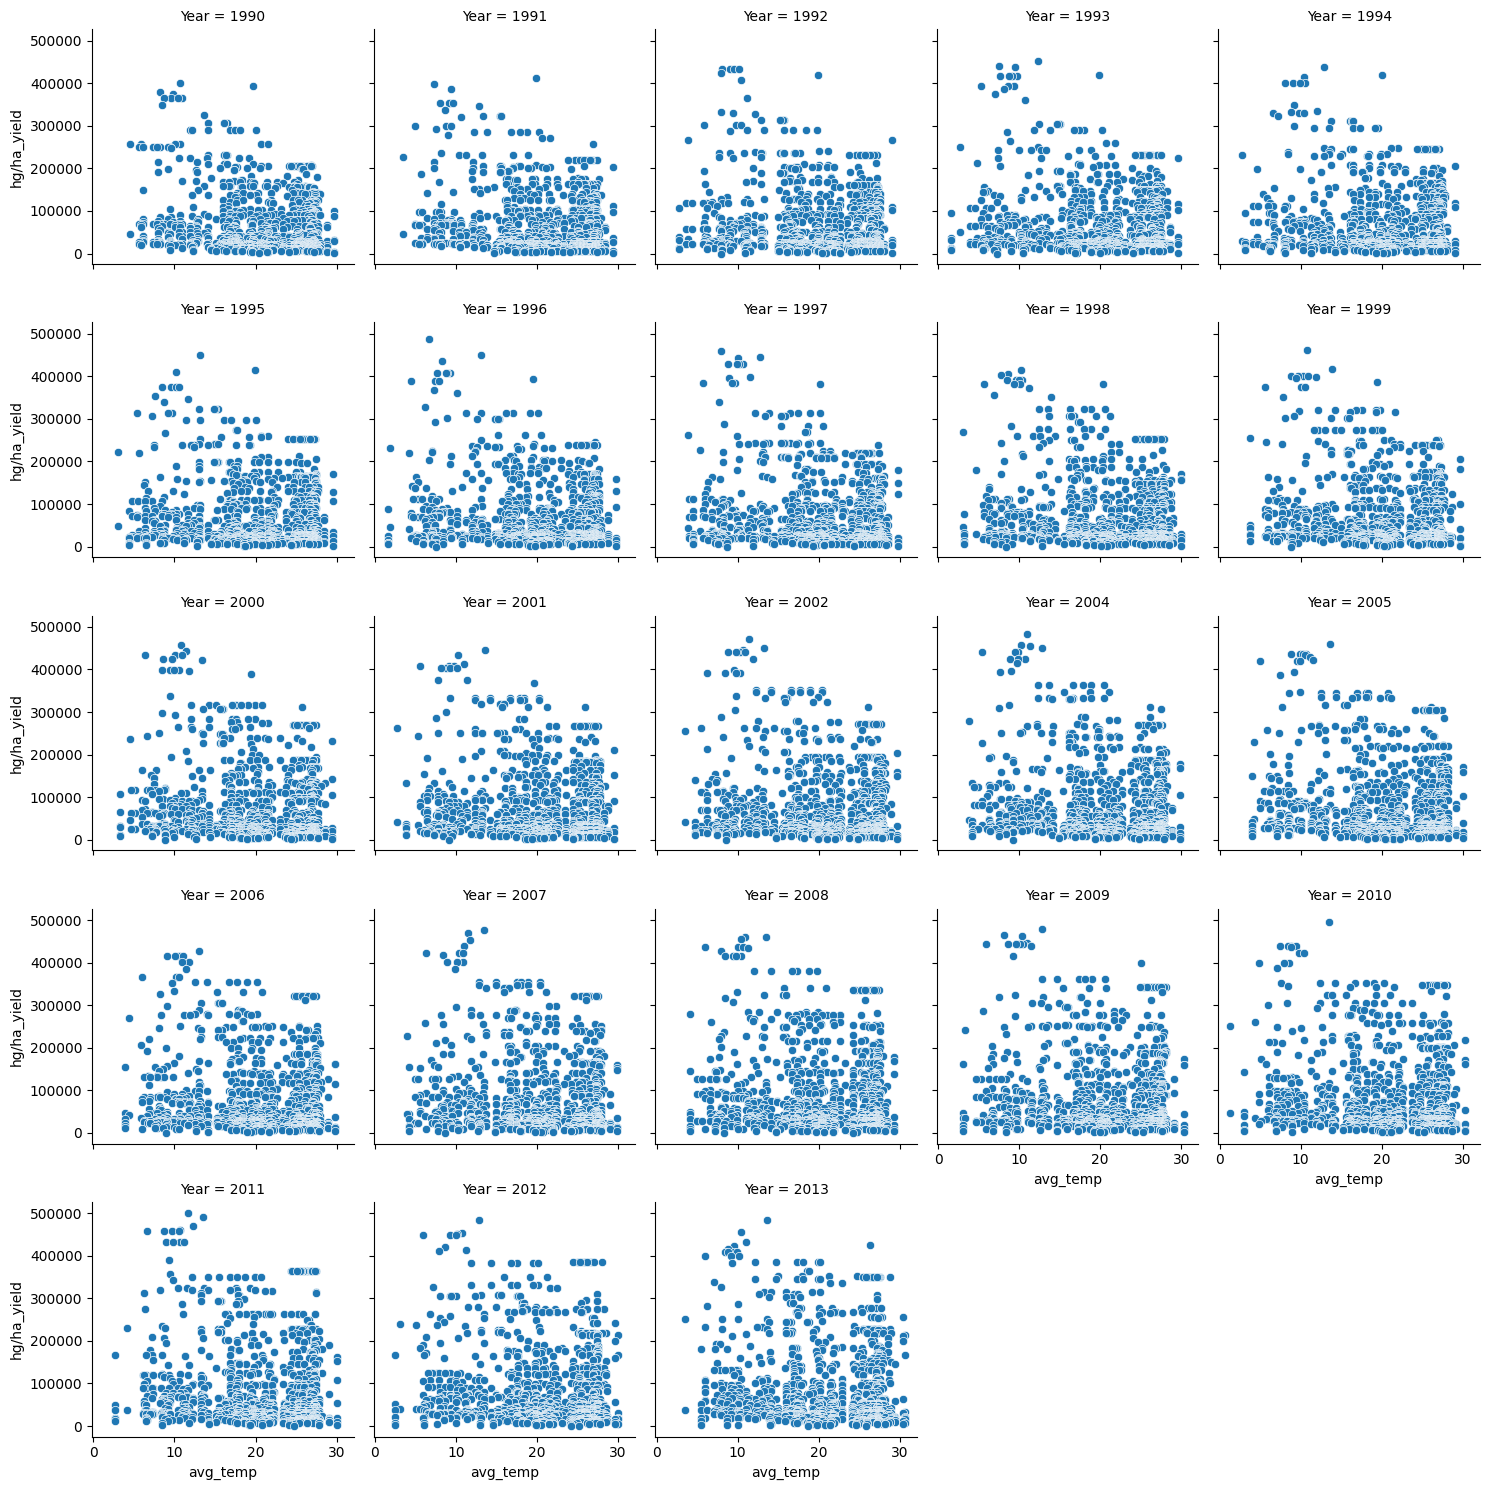

In [38]:
average_temp_yield = data.groupby(["avg_temp","Year","Item"])['hg/ha_yield'].max().sort_values(ascending=False).reset_index()
g = sns.FacetGrid(average_temp_yield,col='Year',col_wrap=5)
g.map_dataframe(sns.scatterplot,x='avg_temp',y='hg/ha_yield')
plt.show()

# **Insights**

> based on charts most of high amount of crop yield over the years that has lower average temp and also of low amount of crop yield over the years that has high average temp

# **Suggested Action**

> making a Tents for crops to to fit the suitable temperature

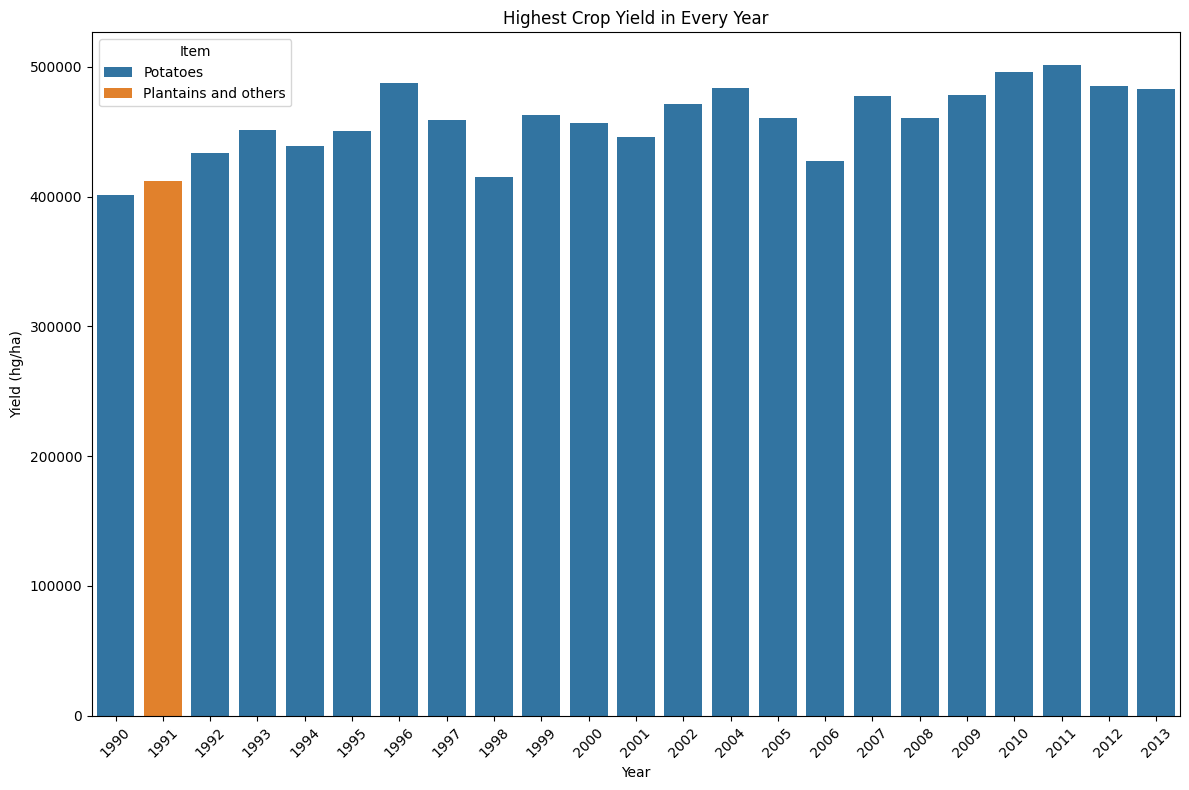

In [39]:
largest_yield_years = data.groupby(["Item","Year"])["hg/ha_yield"].max().sort_values(ascending=False).reset_index()
highest_yield_per_year = largest_yield_years.loc[largest_yield_years.groupby('Year')['hg/ha_yield'].idxmax()]
plt.figure(figsize=(12, 8))
sns.barplot(data=highest_yield_per_year, x='Year', y='hg/ha_yield', hue='Item')

plt.xticks(rotation=45)
plt.title("Highest Crop Yield in Every Year")
plt.ylabel("Yield (hg/ha)")
plt.xlabel("Year")

plt.tight_layout()
plt.show()

# **Insights**

> Potatoes is the Highest yield every year except 1991 the highest  yield  in that year was plantains and others

# **Suggested Action**

> Export the potatoes , it will help in improving the financial of the country

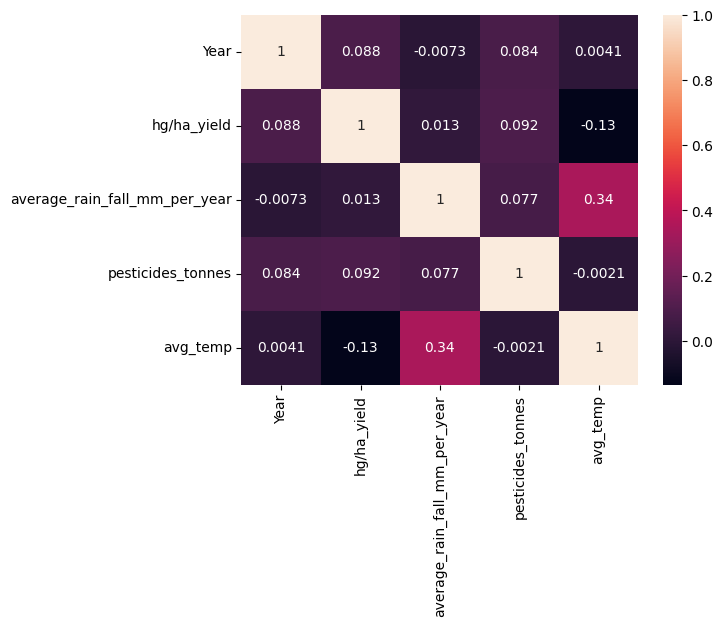

In [40]:
factor_effect = data.groupby(["Year","hg/ha_yield","average_rain_fall_mm_per_year","pesticides_tonnes"])["avg_temp"].max().sort_values(ascending=False).reset_index()
sns.heatmap(factor_effect.corr(),annot=True)
plt.show()

# **Insights**

> Based of the heatmap chart most affected factor between (rain, temp , pesticides) is pesticides with 0.092 then comes the average rain fall with 0.013 then average temperture with -0.13

# **Suggested Actions**

> in my opinion it seems that pesticides in the future can affect more , making more testing to find the perfect pattern  

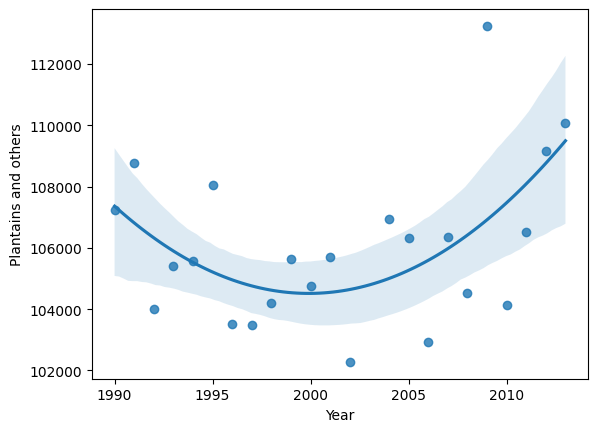

In [41]:
sns.regplot(every_yield_over_years,x='Year',y='Plantains and others',order=2)
plt.show()

#**Insights**

> There is no exactly crop yield with high variability , plantain and others has non-linear U-shaped fitting line

* 1990-2000: There is a downward trend in the early part of the time series, indicating a decrease in the quantity of "Plantains and others" during this period.
* 2000-2012: Starting around 2000, the trend changes direction and begins to increase, showing recovery or growth in the quantity over the years leading up to 2012.

#**Suggested Action**

>
* Increase investment: If the upward trend continues, it might be a good idea to invest more resources (like labor, capital, or technology) into this sector to take advantage of the growth.

* Monitor the drivers: It is essential to monitor what is driving this growth (e.g., market demand, government support, technology improvements) to ensure the trend continues.